# 資料預處理

## 二值化

將原圖轉為黑白
DEMO:

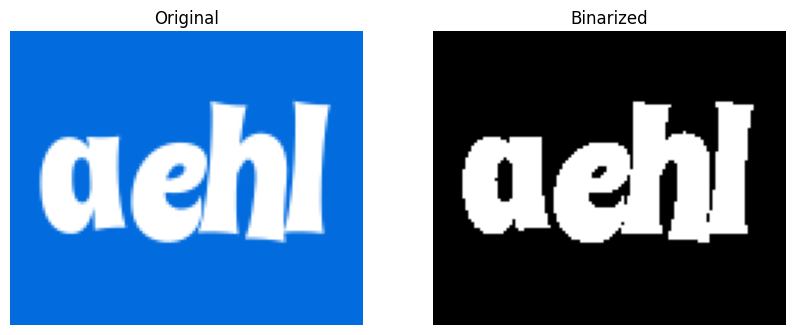

In [4]:
import cv2
import matplotlib.pyplot as plt

# 讀取圖片 (BGR)
img = cv2.imread("test.png")

# 將 BGR 轉為 RGB，方便 matplotlib 正確顯示
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 轉灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 顯示原圖與二值化結果
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Binarized")
plt.imshow(binary, cmap="gray")
plt.axis("off")

plt.show()


## bounding box cropping
切割 DEMO

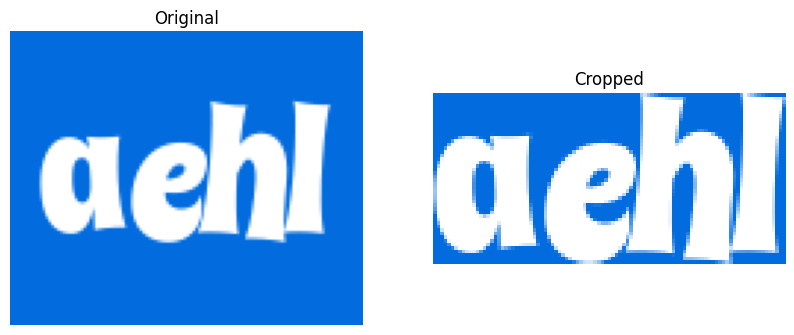

xmin=10, xmax=108, ymin=24, ymax=71


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取圖片
img = cv2.imread("test.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 轉成 RGB 方便 matplotlib 顯示

# 轉灰階
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化（Otsu）
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 找出白色區域
ys, xs = np.where(binary == 255)

if len(xs) > 0 and len(ys) > 0:
    xmin, xmax = xs.min(), xs.max()
    ymin, ymax = ys.min(), ys.max()

    # 切割白色區域
    cropped = img_rgb[ymin:ymax+1, xmin:xmax+1]

    # 顯示原圖與切割結果
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.title("Original")
    plt.imshow(img_rgb)
    plt.axis("off")

    plt.subplot(1,2,2)
    plt.title("Cropped")
    plt.imshow(cropped)
    plt.axis("off")

    plt.show()

    print(f"xmin={xmin}, xmax={xmax}, ymin={ymin}, ymax={ymax}")
else:
    print("沒有偵測到白色區域")


批次處理

In [8]:
import cv2
import numpy as np
import os
from tqdm import tqdm  # 顯示進度條

# 資料夾設定
input_dir = "captcha_raw"
output_dir = "captcha_cooked"

# 建立輸出資料夾（若不存在）
os.makedirs(output_dir, exist_ok=True)

# 取得所有 PNG 檔案
files = [f for f in os.listdir(input_dir) if f.lower().endswith('.png')]

# 批次處理
for f in tqdm(files, desc="Processing", unit="img"):
    input_path = os.path.join(input_dir, f)
    output_path = os.path.join(output_dir, f)

    # 讀取圖片
    img = cv2.imread(input_path)
    if img is None:
        continue  # 若讀取失敗則跳過

    # 轉灰階
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Otsu 二值化
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # 找白色像素的位置
    ys, xs = np.where(binary == 255)

    if len(xs) > 0 and len(ys) > 0:
        xmin, xmax = xs.min(), xs.max()
        ymin, ymax = ys.min(), ys.max()

        # 切割原圖（保留原始 RGB）
        cropped = img[ymin:ymax+1, xmin:xmax+1]

        # 轉成灰階後再二值化，確保輸出是黑白
        gray_cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        _, binary_cropped = cv2.threshold(gray_cropped, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # 儲存結果
        cv2.imwrite(output_path, binary_cropped)
    else:
        print(f"⚠️ No white region detected in {f}")


Processing: 100%|██████████| 467/467 [00:00<00:00, 1322.22img/s]
